# Data Preprocessing And Visualisation

In [1]:
#Imported Important Library, Module.
import cv2
import pandas as pd
import numpy as np
import os
import seaborn as sns
import tensorflow as tf
from skimage.feature import hog
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from random import shuffle
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data.sampler import SubsetRandomSampler
# Contrast Stretching
from PIL import Image


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#Fetching Links of Image Directories
DATADIR='/content/drive/MyDrive/X-Ray_2000'
COVID_PATH='/content/drive/MyDrive/X-Ray_2000/covid'
NORMAL_PATH="/content/drive/MyDrive/X-Ray_2000/normal"

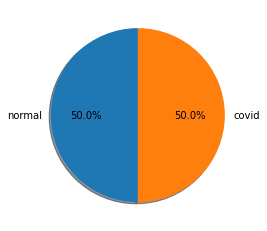

In [4]:
#Pi-chart for the dataset distribution.
class_names = os.listdir(DATADIR)
image_count = {}
for i in class_names:
    image_count[i] = len(os.listdir(os.path.join(DATADIR,i)))

#Plotting Distribution of Each Classes
fig1, ax1 = plt.subplots()
ax1.pie(image_count.values(),
        labels = image_count.keys(),
        shadow=True,
        autopct = '%1.1f%%',
        startangle=90)
plt.show()

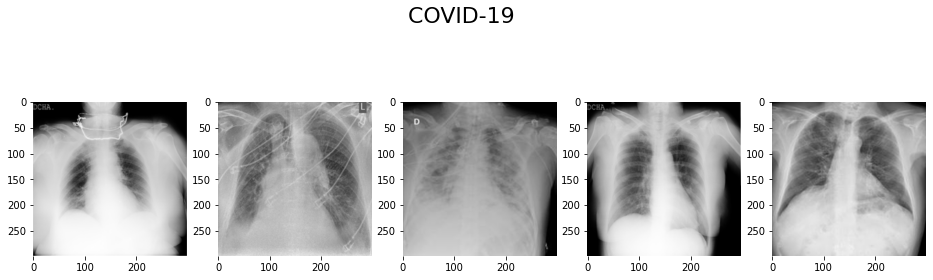

In [5]:
#Viewing Some Chest X-Ray Images of Covid-19 
fig = plt.figure(figsize=(16,5))
fig.suptitle("COVID-19 ", size=22)
img_paths = os.listdir(COVID_PATH)
shuffle(img_paths)

for i,image in enumerate(img_paths[:5]):
    img = cv2.imread(os.path.join(COVID_PATH, image))
    plt.subplot(1,5, i+1, frameon=False)
    plt.imshow(img)
fig.show()

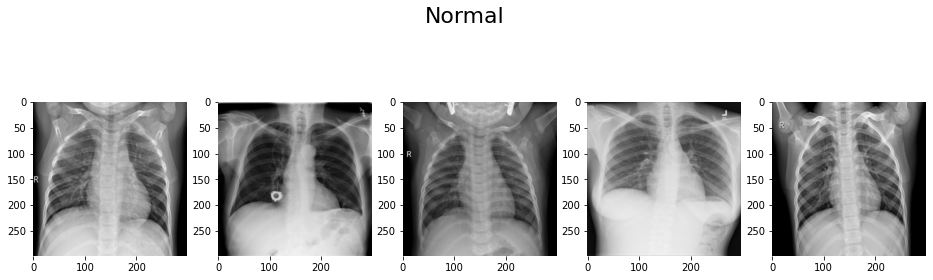

In [6]:
#Viewing Some Chest X-Ray Images of Normal Patients
fig = plt.figure(figsize=(16,5))
fig.suptitle("Normal", size=22)
img_paths = os.listdir(NORMAL_PATH)
shuffle(img_paths)

for i,image in enumerate(img_paths[:5]):
    img = cv2.imread(os.path.join(NORMAL_PATH, image))
    plt.subplot(1,5, i+1, frameon=False)
    plt.imshow(img)
fig.show()

In [7]:
#Finding The Total Count Of Images And Checking The Dimension Of Covid Images.
covid_len=len(os.listdir(COVID_PATH))
normal_len=len(os.listdir(NORMAL_PATH))
print("Total Count Of Covid Images : {} \nTotal Count Of Normal Images: {}" .format(covid_len,normal_len))

image_dimension=img.shape
print('Dimension Of Image Is: {}' .format(image_dimension))

Total Count Of Covid Images : 2000 
Total Count Of Normal Images: 2000
Dimension Of Image Is: (299, 299, 3)


In [8]:
#fetching the path of covid-images.
urls = os.listdir(COVID_PATH)
path = COVID_PATH+ urls[0]


#Median Filter Function

#######The median filter is the filtering technique used for noise removal from images and signals. Median filter is very crucial in the image processing field as it is well known for the preservation of edges during noise removal.

In [41]:
def median_filter(image_array):
    image_shape = image_array.shape
    # taking the width and height of the image
    width = image_shape[1]
    # converting the image to a vector to ease the computations
    # make a 1-dimensional view of arr
    #vector = image_array.ravel().copy()
    vector_real = image_array.ravel().copy()
    # print(f"before the loop : {len(vector_real)}")
    for index, x in enumerate(vector_real):
        if ((index+1)%width-1!=1 and index%width!=0 and index>width-1 and index<len(vector_real)-width-1): # aviod edges 2d arrays for median filter
            median_pixel_value = [
            vector_real[index-width-1],vector_real[index-width],vector_real[index-width+1],
            vector_real[index-1],vector_real[index],vector_real[index+1]
            ,vector_real[index+width-1],vector_real[index+width],vector_real[index+width+1]] 
            median_pixel_value.sort()
            vector_real[index] = median_pixel_value[len(median_pixel_value) // 2]  
    # converting the vector back to the shape of the image
    image_array_after = np.asarray(vector_real).reshape(image_shape)
    return image_array_after

/content/drive/MyDrive/X-Ray_2000/covid/COVID-1.png
(299, 299)
before the loop : 89401


Text(0.5, 1.0, 'After Median Filter')

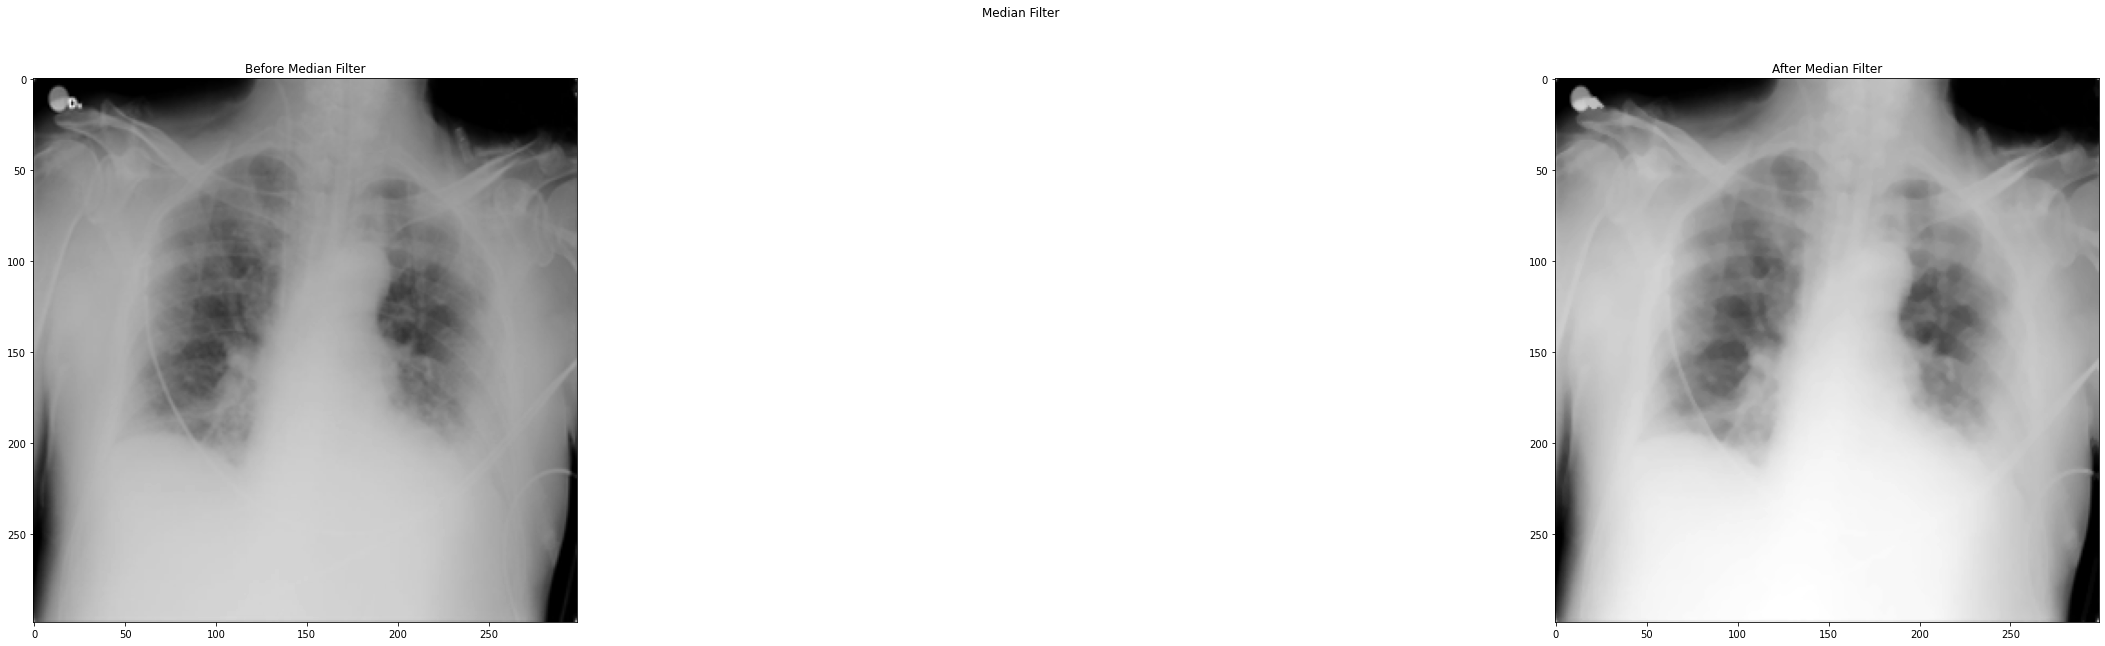

In [34]:

path1='/content/drive/MyDrive/X-Ray_2000/covid/COVID-1.png'
print(path1)
image = Image.open(path1).convert('L')
# converting image to array
image_array = np.asarray(image)
# showing the shape of the image
print(image_array.shape)
# doing the clipping filter on the image array
image_array_after = median_filter(image_array)
# converting the image back from the array
image_after = Image.fromarray(image_array_after)
# image_after.resize((100,100))
# showing the image before and after the operations
fig = plt.figure(figsize=(50, 10))
fig.suptitle("Median Filter")
fig.add_subplot(1, 2, 1)
# showing the image before range compression
plt.imshow(image, cmap="gray")
plt.title("Before Median Filter")
# showing the image after range compression
fig.add_subplot(1, 2, 2)
plt.imshow(image_after, cmap="gray")
plt.title("After Median Filter")

In [55]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img =Image.open(img_path).convert('L')
    #print(img_path)
    # img = img / 255.0
    # if we want to resize the images
    # img = cv2.resize(img, (100, 100))
    img=img.resize((100,100))
    #Converting Image to array
    # img=img.convert('L')
    img_array=np.asarray(img)
    img_array_after=median_filter(img_array)
    # converting the image back from the array
    # img_after = Image.fromarray(img_array_after)
    images.append(img_array_after)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [56]:
#label of covid images is 1.
covidUrl = os.listdir(COVID_PATH)
covidImages, covidTargets = loadImages(COVID_PATH, covidUrl, 1)

In [57]:
len(covidUrl), len(covidImages)

(2000, 2000)

In [59]:
#label of normal images is 0
normal_path = NORMAL_PATH
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [60]:
print("covid image dimension and count: {}\nnormal image dimension and count: {}" .format(covidImages.shape,normalImages.shape))

covid image dimension and count: (2000, 100, 100)
normal image dimension and count: (2000, 100, 100)


In [61]:
covidImages = np.asarray(covidImages)
normalImages = np.asarray(normalImages)
#checking the dimension of the data
print(covidImages.ndim)


3


In [64]:
#concatenating both normal image and covid image and collecting it as a data...
data = np.r_[covidImages, normalImages]
print("Length Of Data Is: {}" .format(len(data)))
#cheing the size of the data 
data=data.reshape((4000,10000))
print("Data  Shape: {}\nData Dimension: {}" .format(data.shape,data.ndim))

Length Of Data Is: 4000
Data  Shape: (4000, 10000)
Data Dimension: 2


In [65]:
#concatenating the label of the images
#only two targets is there.
# 1 stands for the covid images.
#0 stands for the normal images.
targets = np.r_[covidTargets, normalTargets]
targets.shape


(4000,)

# Splitting Datasets Between Training And Testing. 

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [67]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.20)

# Training Model Using Support Vector Machine SVM

In [68]:
#Note:: To apply SVM we have to first reduce the dimesion of the images.
#Svm work only on with dimesion <=2.
from sklearn.svm import SVC
# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=2)
# fit model
svm.fit(x_train, y_train)

SVC(kernel='linear', probability=True, random_state=2)

## Evaluation

In [69]:
# generate predictions
y_pred = svm.predict(x_test)
print(y_pred)
print(y_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

[0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0
 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0
 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0
 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1
 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1
 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0
 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1
 1 1 1 1 1 0 1 1 0 0 0 1 

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[327  76]
 [ 38 359]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       403
           1       0.83      0.90      0.86       397

    accuracy                           0.86       800
   macro avg       0.86      0.86      0.86       800
weighted avg       0.86      0.86      0.86       800



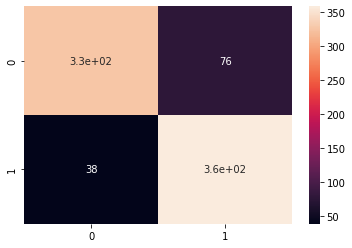

In [71]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

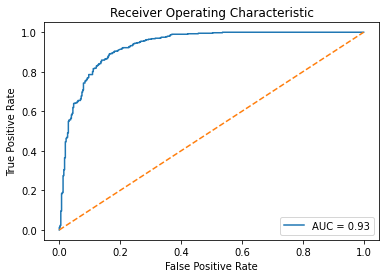

In [72]:

# predict probabilities for X_test using predict_proba
probabilities = svm.predict_proba(x_test)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

###Training Model Using Random Forest


In [73]:
from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier()
rmodel.fit(x_train,y_train)

RandomForestClassifier()

In [74]:
#Training Accuracy
#Accuracy Of Random Forst over Training Data
rmodel.score(x_train,y_train)

1.0

In [75]:
#Testing Accuracy
#accuracy of random forest over test data
accuracy=rmodel.score(x_test,y_test)
print('Model accuracy is: ', accuracy)
#decision tree is more memorising the data then random forest
#The Training and Testing accuracy are just having diffrerence of 6% means very less error in case of random forest.


Model accuracy is:  0.93


In [92]:
y_pred = rmodel.predict(x_test) 
print(x)
x=np.random.randint(1,400)
if y_test[x]==0:
  print("Actual Output: Not Infected With Covid-19")
else:
  print("Actual Output: Infected With Covid-19")
if y_pred[x]==0:
  print("Predicted Output: Not Infected With Covid-19")
else:
  print("Predicted Output: Infected With Covid-19")

#predicitng   
 # 1 For Covid
 # 0 for Normal

149
Actual Output: Infected With Covid-19
Predicted Output: Infected With Covid-19


In [93]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[356  47]
 [  9 388]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       403
           1       0.89      0.98      0.93       397

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



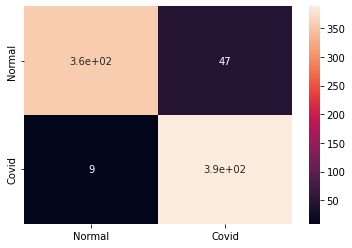

<Figure size 216x216 with 0 Axes>

In [94]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True,xticklabels=['Normal','Covid'], yticklabels=['Normal','Covid'])
plt.figure(figsize=(3,3))
plt.show()

###Training Model Using KNN(K-Nearest Neighbours)

In [95]:
# since its a multi-class prediction, in order to prevent error we need some library
from sklearn.multiclass import OneVsRestClassifier

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn = OneVsRestClassifier(KNeighborsClassifier())

In [97]:
knn.fit(x_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [98]:
# predict for one observation
y_pred = knn.predict(x_test) 

print(y_pred)
print(y_test)


[0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1
 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1
 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0
 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0
 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1
 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0
 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0
 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1
 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1
 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0
 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1
 1 1 1 1 0 0 1 1 1 1 0 1 

In [99]:
print('KNN Accuracy: %.3f' % accuracy_score(y_test,y_pred))

KNN Accuracy: 0.909


In [100]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[344  59]
 [ 14 383]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       403
           1       0.87      0.96      0.91       397

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



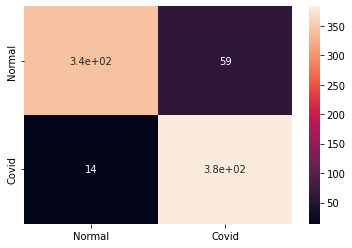

<Figure size 216x216 with 0 Axes>

In [101]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True,xticklabels=['Normal','Covid'], yticklabels=['Normal','Covid'])
plt.figure(figsize=(3,3))
plt.show()